In [1]:
import os, os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


<h3>Create dataframe by combining csv and case files located in /data folder</h3>

In [2]:
dataPath = os.getcwd() + '/data/data3/'
caseCount = len(os.listdir(dataPath))
data = []
try:
    os.remove(dataPath + ".DS_Store")
except:
    print("No file DS_Store")
for filename in os.listdir(dataPath):
#     print(filename)
    f = open(os.path.join(dataPath, filename), encoding='utf-8')
    data.append([filename.replace('.txt', ''), f.read()])

verdict_df = pd.DataFrame(data, columns=['Case ID', 'Case Text'])
cases_df = pd.read_csv('./cases3.csv', usecols = ['GerechtelijkProductType', 'Case ID', 'Proceduresoorten', 'Publicatiedatum', 'Rechtsgebieden', 'Tekstfragment', 'Titel', 'Uitspraakdatum', 'UitspraakdatumType'])
merged_df = cases_df.join(verdict_df.set_index('Case ID'), on='Case ID', how='left')
print(merged_df)


No file DS_Store
                                           Tekstfragment  \
0      Productie synthetische drugs, medeplegen, prod...   
1      Leveren grondstoffen synthetische drugs en sto...   
2      plegen van voorbereidingshandelingen ten behoe...   
3      medeplegen witwassen - medeplegen voorhanden h...   
4      medeplegen witwassen - medeplegen voorhanden h...   
...                                                  ...   
17447  De rechtbank acht bewezen dat er sprake is van...   
17448  Conclusie AG. Vervolging van een politieagent ...   
17449  Liquidatieproces Passage\n\n                  ...   
17450  De rechtbank acht bewezen dat verdachte zich s...   
17451  Verdachte en zijn medeverdachten hebben tezame...   

                                                   Titel Uitspraakdatum  \
0      Rechtbank Noord-Nederland, 01-10-2021, 18/0482...     01-10-2021   
1            Rechtbank Zutphen, 03-06-2003, 06/080083-03     03-06-2003   
2      Rechtbank Zeeland-West-Brabant

<h3>Select a case:</h3>

In [3]:
print(merged_df.iloc[-1])

Tekstfragment              Verdachte en zijn medeverdachten hebben tezame...
Titel                        Gerechtshof Amsterdam, 13-07-2007, 23-001835-04
Uitspraakdatum                                                    13-07-2007
UitspraakdatumType                                                 uitspraak
Publicatiedatum                                                   29-08-2007
GerechtelijkProductType                                            uitspraak
Proceduresoorten                                            ['Hoger beroep']
Rechtsgebieden                                                ['Strafrecht']
Case ID                                            ECLI-NL-GHAMS-2007-BB2447
Case Text                  \n\narrestnummer: \nparketnummer:\t23-001835-0...
Name: 17451, dtype: object


<h3>Text of last case:</h3>

In [8]:
last_case_text = merged_df["Case Text"].iloc[-1]
# print(last_case_text)

<h3>Find mentions in dataframe</h3>

In [4]:
def count_mentions(keyword):
    dates = []
    counts = []
    keyword = keyword.lower()
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current["Uitspraakdatum"]

        current_case_text = current['Case Text']
        occurrences = current_case_text.lower().count(keyword)

        dates.append(current_date)
        counts.append(occurrences)

    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results

In [5]:
def count_multiple_mentions(keyword1, keyword2):
    dates = []
    counts = []
    keyword1 = keyword1.lower()
    keyword2 = keyword2.lower()
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current["Uitspraakdatum"]
        current_case_text = current['Case Text']
        occurrences = current_case_text.lower().count(keyword1) + current_case_text.lower().count(keyword2)

        dates.append(current_date)
        counts.append(occurrences)

    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results


<h3> Example for MDMA results</h3>

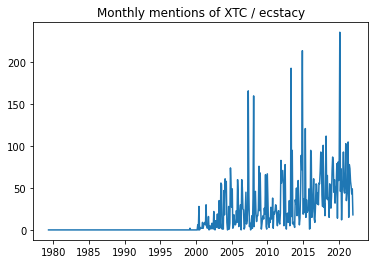

In [11]:
mdma_results = count_multiple_mentions('XTC', 'ecstacy')
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_result = mdma_results.resample('1M').sum()

plt.plot(monthly_mdma_result)
plt.title("Monthly mentions of XTC / ecstacy")

plt.show()



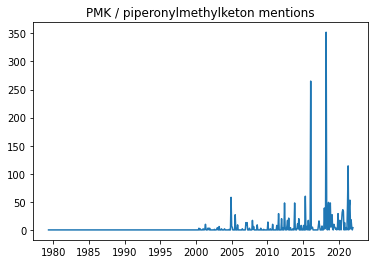

In [12]:
pmk_results = count_multiple_mentions('PMK', 'piperonylmethylketon')
pmk_results.set_index('date', inplace=True)
pmk_results.index = pd.to_datetime(pmk_results.index)
monthly_pmk_result = pmk_results.resample('1M').sum()

plt.plot(monthly_pmk_result)
plt.title("PMK / piperonylmethylketon mentions")
plt.show()

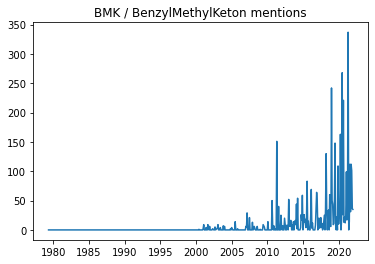

In [13]:
bmk_results = count_multiple_mentions('BenzylMethylKeton', 'bmk')
bmk_results.set_index('date', inplace=True)
bmk_results.index = pd.to_datetime(bmk_results.index)
monthly_bmk_result = bmk_results.resample('1M').sum()

plt.plot(monthly_bmk_result)
plt.title("BMK / BenzylMethylKeton mentions")
plt.show()

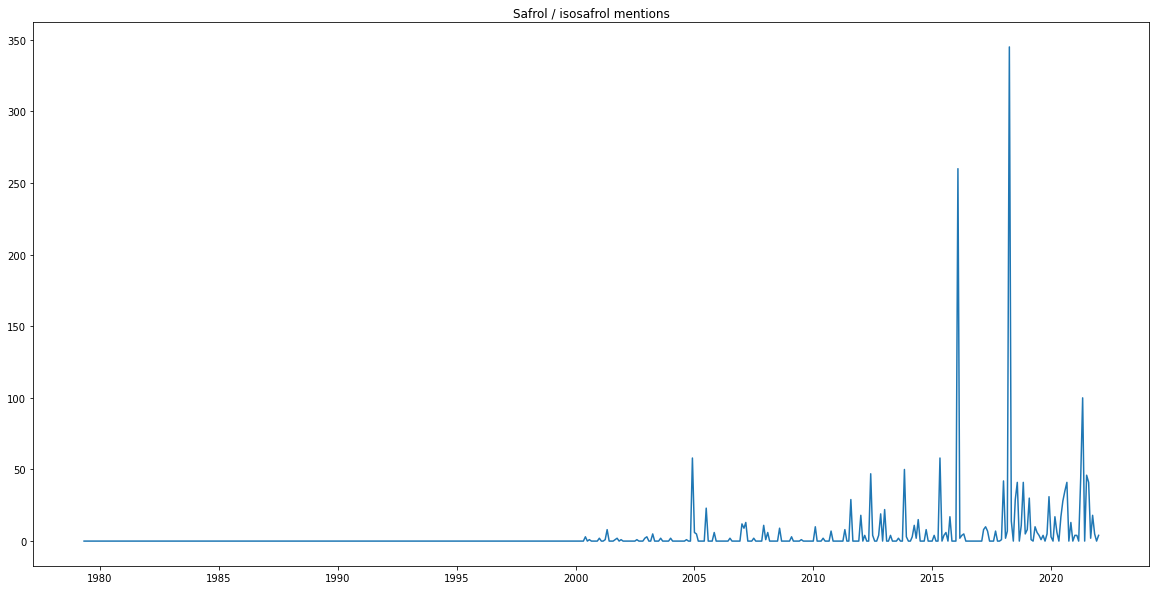

In [149]:
safrol_results = count_multiple_mentions('PMK-glycidaat', 'PMK')
safrol_results.set_index('date', inplace=True)
safrol_results.index = pd.to_datetime(safrol_results.index)
monthly_safrol_result = safrol_results.resample('1M').sum()

plt.plot(monthly_safrol_result)
plt.title("Safrol / isosafrol mentions")
plt.show()

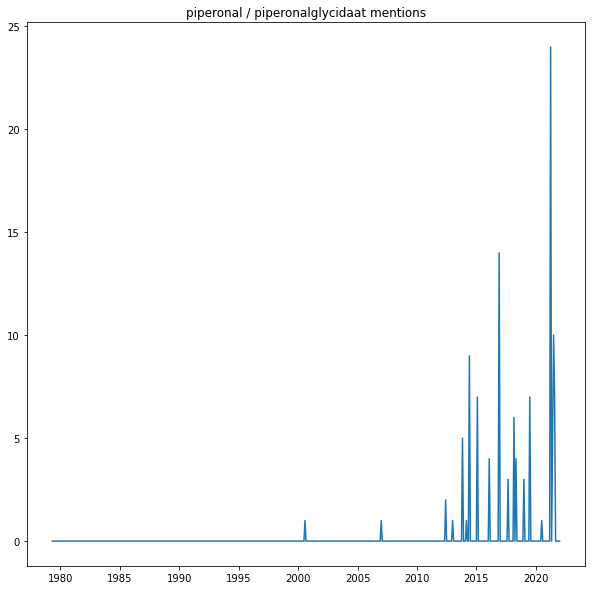

In [174]:
piperonal_results = count_multiple_mentions('piperonal', 'piperonalglycidaat')
piperonal_results.set_index('date', inplace=True)
piperonal_results.index = pd.to_datetime(piperonal_results.index)
monthly_piperonal_result = piperonal_results.resample('1M').sum()

plt.plot(monthly_piperonal_result)
plt.title("piperonal / piperonalglycidaat mentions")
plt.show()

In [128]:
print(monthly_bmk_result[130:])

            count
date             
2000-01-31      0
2000-02-29      0
2000-03-31      0
2000-04-30      0
2000-05-31      1
...           ...
2021-08-31     12
2021-09-30     29
2021-10-31     72
2021-11-30     16
2021-12-31     29

[264 rows x 1 columns]


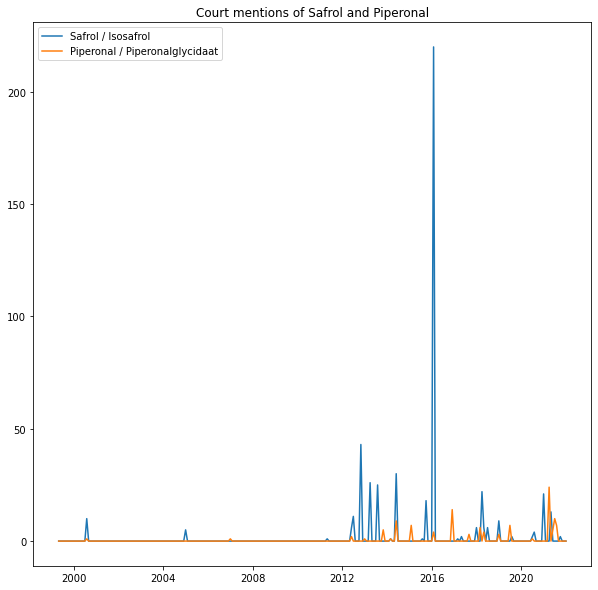

In [172]:
plt.plot(monthly_safrol_result[240:].multiply(1), label = "Safrol / Isosafrol")
plt.plot(monthly_piperonal_result[240:].multiply(1), label = "Piperonal / Piperonalglycidaat")
plt.title("Court mentions of Safrol and Piperonal")
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.show()

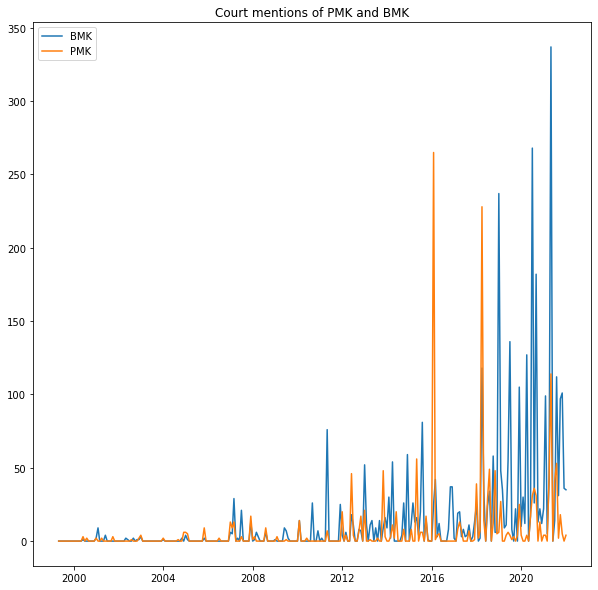

In [156]:
plt.plot(monthly_bmk_result[240:].multiply(1), label = "BMK")
plt.plot(monthly_pmk_result[240:].multiply(1), label = "PMK")
plt.title("Court mentions of PMK and BMK")
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.show()

<h3>Sewage data from ERIC</h3>https://opendata.eawag.ch/dataset/illicit-drugs-in-wastewater-score-initiative

2011 mean    759.269
2012 mean    1718.68
2013 mean    636.419
2014 mean     9532.9
2015 mean    359.222
2016 mean    214.489
2017 mean    530.036
Name: 5, dtype: object


Text(0.5, 1.0, 'MDMA in wastewater in NL')

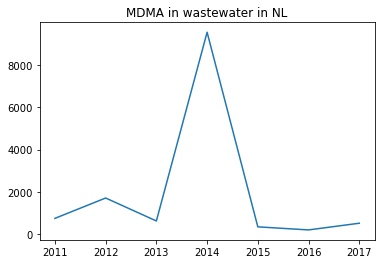

In [15]:
mdma_wastewater = pd.read_csv('./sewerdata/score_mdma_wastewater_loads_2011_2017.csv', delimiter=';')
mdma_wastewater = pd.DataFrame(mdma_wastewater).fillna(0)

nl_mdma_wastewater = mdma_wastewater.loc[mdma_wastewater['country'] == 'NL']
nl_mdma_wastewater = nl_mdma_wastewater.append(nl_mdma_wastewater.sum(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
nl_mdma_wastewater = nl_mdma_wastewater.drop(columns = columns_to_drop)
nl_mdma_wastewater = nl_mdma_wastewater.iloc[5][2:]
print(nl_mdma_wastewater)
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
nl_mdma_wastewater.index = new_index
plt.plot(nl_mdma_wastewater)
plt.title("MDMA in wastewater in NL")


2011 mean    3246.81
2012 mean    491.007
2013 mean    1246.83
2014 mean     404.73
2015 mean    702.682
2016 mean    9308.57
2017 mean    789.385
Name: 5, dtype: object


Text(0.5, 1.0, 'Amphetamine in wastewater in NL')

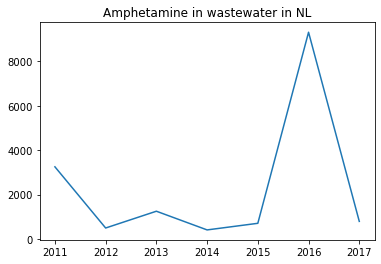

In [16]:
amphetamine_wastewater = pd.read_csv('./sewerdata/score_amphetamine_wastewater_loads_2011_2017.csv', delimiter=';')
amphetamine_wastewater = pd.DataFrame(amphetamine_wastewater).fillna(0)

nl_amphetamine_wastewater = amphetamine_wastewater.loc[amphetamine_wastewater['country'] == 'NL']
nl_amphetamine_wastewater = nl_amphetamine_wastewater.append(nl_amphetamine_wastewater.sum(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
nl_amphetamine_wastewater = nl_amphetamine_wastewater.drop(columns = columns_to_drop)
nl_amphetamine_wastewater = nl_amphetamine_wastewater.iloc[5][2:9]
print(nl_amphetamine_wastewater)
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
nl_amphetamine_wastewater.index = new_index
plt.plot(nl_amphetamine_wastewater)
plt.title("Amphetamine in wastewater in NL")




2011 mean     3.253012
2012 mean     3.296156
2013 mean     4.808744
2014 mean     8.469733
2015 mean     6.919414
2016 mean    10.641817
2017 mean     9.497423
Name: 132, dtype: float64


Text(0.5, 1.0, 'Drugs found in wastewater in mg/1000 per person/day')

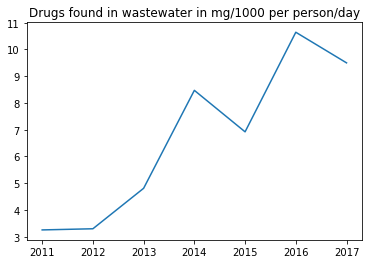

In [17]:
combined_wastewater = pd.read_csv('./sewerdata/score_combined_doses_2011_2017.csv', delimiter=';')
combined_wastewater = pd.DataFrame(combined_wastewater).fillna(0)

total_combined_wastewater = combined_wastewater
total_combined_wastewater = total_combined_wastewater.append(total_combined_wastewater.mean(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
total_combined_wastewater = total_combined_wastewater.drop(columns = columns_to_drop)
total_combined_wastewater = total_combined_wastewater[["2011 mean", "2012 mean","2013 mean","2014 mean","2015 mean","2016 mean","2017 mean"]]
print(total_combined_wastewater.iloc[-1])
total_combined_wastewater = total_combined_wastewater.iloc[-1]
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
total_combined_wastewater.index = new_index
plt.plot(total_combined_wastewater, label="Wastewater")
plt.title("Drugs found in wastewater in mg/1000 per person/day")




<h1>Data from 'Wastewater analysis and drugs — a European multi-city study' </h1>https://www.emcdda.europa.eu/publications/html/pods/waste-water-analysis_en#source-data 

In [6]:
yearIndex = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


<h3> Amphetamines NL Daily</h3>

In [7]:
amphetamine_2011 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2011.csv', delimiter=',')
amphetamine_2012 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2012.csv', delimiter=',')
amphetamine_2013 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2013.csv', delimiter=',')
amphetamine_2014 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2014.csv', delimiter=',')
amphetamine_2015 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2015.csv', delimiter=',')
amphetamine_2016 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2016.csv', delimiter=',')
amphetamine_2017 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2017.csv', delimiter=',')
amphetamine_2018 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2018.csv', delimiter=',')
amphetamine_2019 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2019.csv', delimiter=',')
amphetamine_2020 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2020.csv', delimiter=',')

amphetamine_2011_NL_daily = amphetamine_2011[amphetamine_2011['country'] == "NL"][['Daily mean']]
amphetamine_2011_NL_daily_mean = amphetamine_2011_NL_daily.mean().iloc[0]

amphetamine_2012_NL_daily = amphetamine_2012[amphetamine_2012['country'] == "NL"][['Daily mean']]
amphetamine_2012_NL_daily_mean = amphetamine_2012_NL_daily.mean().iloc[0]

amphetamine_2013_NL_daily = amphetamine_2013[amphetamine_2013['country'] == "NL"][['Daily mean']]
amphetamine_2013_NL_daily_mean = amphetamine_2013_NL_daily.mean().iloc[0]

amphetamine_2014_NL_daily = amphetamine_2014[amphetamine_2014['country'] == "NL"][['Daily mean']]
amphetamine_2014_NL_daily_mean = amphetamine_2014_NL_daily.mean().iloc[0]

amphetamine_2015_NL_daily = amphetamine_2015[amphetamine_2015['country'] == "NL"][['Daily mean']]
amphetamine_2015_NL_daily_mean = amphetamine_2015_NL_daily.mean().iloc[0]

amphetamine_2016_NL_daily = amphetamine_2016[amphetamine_2016['country'] == "NL"][['Daily mean']]
amphetamine_2016_NL_daily_mean = amphetamine_2016_NL_daily.mean().iloc[0]

amphetamine_2017_NL_daily = amphetamine_2017[amphetamine_2017['country'] == "NL"][['Daily mean']]
amphetamine_2017_NL_daily_mean = amphetamine_2017_NL_daily.mean().iloc[0]

amphetamine_2018_NL_daily = amphetamine_2018[amphetamine_2018['country'] == "NL"][['Daily mean']]
amphetamine_2018_NL_daily_mean = amphetamine_2018_NL_daily.mean().iloc[0]

amphetamine_2019_NL_daily = amphetamine_2019[amphetamine_2019['country'] == "NL"][['Daily mean']]
amphetamine_2019_NL_daily_mean = amphetamine_2019_NL_daily.mean().iloc[0]

amphetamine_2020_NL_daily = amphetamine_2020[amphetamine_2020['country'] == "NL"][['Daily mean']]
amphetamine_2020_NL_daily_mean = amphetamine_2020_NL_daily.mean().iloc[0]

amphetamine_series = pd.Series([amphetamine_2011_NL_daily_mean, amphetamine_2012_NL_daily_mean, amphetamine_2013_NL_daily_mean, amphetamine_2014_NL_daily_mean, amphetamine_2015_NL_daily_mean, amphetamine_2016_NL_daily_mean, amphetamine_2017_NL_daily_mean, amphetamine_2018_NL_daily_mean, amphetamine_2019_NL_daily_mean, amphetamine_2020_NL_daily_mean])
amphetamine_series.index = yearIndex
# plt.plot(amphetamine_series)


<h3>Methamphetamines in NL daily</h3>

In [8]:
methamphetamine_2011 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2011.csv', delimiter=',')
methamphetamine_2012 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2012.csv', delimiter=',')
methamphetamine_2013 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2013.csv', delimiter=',')
methamphetamine_2014 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2014.csv', delimiter=',')
methamphetamine_2015 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2015.csv', delimiter=',')
methamphetamine_2016 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2016.csv', delimiter=',')
methamphetamine_2017 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2017.csv', delimiter=',')
methamphetamine_2018 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2018.csv', delimiter=',')
methamphetamine_2019 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2019.csv', delimiter=',')
methamphetamine_2020 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2020.csv', delimiter=',')

methamphetamine_2011_NL_daily = methamphetamine_2011[methamphetamine_2011['country'] == "NL"][['methamphetamineMean2011']]
methamphetamine_2011_NL_daily_mean = methamphetamine_2011_NL_daily.mean().iloc[0]

methamphetamine_2012_NL_daily = methamphetamine_2012[methamphetamine_2012['country'] == "NL"][['Daily mean']]
methamphetamine_2012_NL_daily_mean = methamphetamine_2012_NL_daily.mean().iloc[0]

methamphetamine_2013_NL_daily = methamphetamine_2013[methamphetamine_2013['country'] == "NL"][['Daily mean']]
methamphetamine_2013_NL_daily_mean = methamphetamine_2013_NL_daily.mean().iloc[0]

methamphetamine_2014_NL_daily = methamphetamine_2014[methamphetamine_2014['country'] == "NL"][['Daily mean']]
methamphetamine_2014_NL_daily_mean = methamphetamine_2014_NL_daily.mean().iloc[0]

methamphetamine_2015_NL_daily = methamphetamine_2015[methamphetamine_2015['country'] == "NL"][['Daily mean']]
methamphetamine_2015_NL_daily_mean = methamphetamine_2015_NL_daily.mean().iloc[0]

methamphetamine_2016_NL_daily = methamphetamine_2016[methamphetamine_2016['country'] == "NL"][['Daily mean']]
methamphetamine_2016_NL_daily_mean = methamphetamine_2016_NL_daily.mean().iloc[0]

methamphetamine_2017_NL_daily = methamphetamine_2017[methamphetamine_2017['country'] == "NL"][['Daily mean']]
methamphetamine_2017_NL_daily_mean = methamphetamine_2017_NL_daily.mean().iloc[0]

methamphetamine_2018_NL_daily = methamphetamine_2018[methamphetamine_2018['country'] == "NL"][['Daily mean']]
methamphetamine_2018_NL_daily_mean = methamphetamine_2018_NL_daily.mean().iloc[0]

methamphetamine_2019_NL_daily = methamphetamine_2019[methamphetamine_2019['country'] == "NL"][['Daily mean']]
methamphetamine_2019_NL_daily_mean = methamphetamine_2019_NL_daily.mean().iloc[0]

methamphetamine_2020_NL_daily = methamphetamine_2020[methamphetamine_2020['country'] == "NL"][['Daily mean']]
methamphetamine_2020_NL_daily_mean = methamphetamine_2020_NL_daily.mean().iloc[0]

methamphetamine_series = pd.Series([methamphetamine_2011_NL_daily_mean, methamphetamine_2012_NL_daily_mean, methamphetamine_2013_NL_daily_mean, methamphetamine_2014_NL_daily_mean, methamphetamine_2015_NL_daily_mean, methamphetamine_2016_NL_daily_mean, methamphetamine_2017_NL_daily_mean, methamphetamine_2018_NL_daily_mean, methamphetamine_2019_NL_daily_mean, methamphetamine_2020_NL_daily_mean])
methamphetamine_series.index = yearIndex
# plt.plot(methamphetamine_series)

<h3>MDMA in NL Daily</h3>

In [9]:
MDMA_2011 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2011.csv', delimiter=',')
MDMA_2012 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2012.csv', delimiter=',')
MDMA_2013 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2013.csv', delimiter=',')
MDMA_2014 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2014.csv', delimiter=',')
MDMA_2015 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2015.csv', delimiter=',')
MDMA_2016 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2016.csv', delimiter=',')
MDMA_2017 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2017.csv', delimiter=',')
MDMA_2018 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2018.csv', delimiter=',')
MDMA_2019 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2019.csv', delimiter=',')
MDMA_2020 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2020.csv', delimiter=',')

MDMA_2011_NL_daily = MDMA_2011[MDMA_2011['country'] == "NL"][['Daily mean']]
MDMA_2011_NL_daily_mean = MDMA_2011_NL_daily.mean().iloc[0]

MDMA_2012_NL_daily = MDMA_2012[MDMA_2012['country'] == "NL"][['Daily mean']]
MDMA_2012_NL_daily_mean = MDMA_2012_NL_daily.mean().iloc[0]

MDMA_2013_NL_daily = MDMA_2013[MDMA_2013['country'] == "NL"][['Daily mean']]
MDMA_2013_NL_daily_mean = MDMA_2013_NL_daily.mean().iloc[0]

MDMA_2014_NL_daily = MDMA_2014[MDMA_2014['country'] == "NL"][['Daily mean']]
MDMA_2014_NL_daily_mean = MDMA_2014_NL_daily.mean().iloc[0]

MDMA_2015_NL_daily = MDMA_2015[MDMA_2015['country'] == "NL"][['Daily mean']]
MDMA_2015_NL_daily_mean = MDMA_2015_NL_daily.mean().iloc[0]

MDMA_2016_NL_daily = MDMA_2016[MDMA_2016['country'] == "NL"][['Daily mean']]
MDMA_2016_NL_daily_mean = MDMA_2016_NL_daily.mean().iloc[0]

MDMA_2017_NL_daily = MDMA_2017[MDMA_2017['country'] == "NL"][['Daily mean']]
MDMA_2017_NL_daily_mean = MDMA_2017_NL_daily.mean().iloc[0]

MDMA_2018_NL_daily = MDMA_2018[MDMA_2018['country'] == "NL"][['Daily mean']]
MDMA_2018_NL_daily_mean = MDMA_2018_NL_daily.mean().iloc[0]

MDMA_2019_NL_daily = MDMA_2019[MDMA_2019['country'] == "NL"][['Daily mean']]
MDMA_2019_NL_daily_mean = MDMA_2019_NL_daily.mean().iloc[0]

MDMA_2020_NL_daily = MDMA_2020[MDMA_2020['country'] == "NL"][['Daily mean']]
MDMA_2020_NL_daily_mean = MDMA_2020_NL_daily.mean().iloc[0]

MDMA_series = pd.Series([MDMA_2011_NL_daily_mean, MDMA_2012_NL_daily_mean, MDMA_2013_NL_daily_mean, MDMA_2014_NL_daily_mean, MDMA_2015_NL_daily_mean, MDMA_2016_NL_daily_mean, MDMA_2017_NL_daily_mean, MDMA_2018_NL_daily_mean, MDMA_2019_NL_daily_mean, MDMA_2020_NL_daily_mean])
MDMA_series.index = yearIndex
# plt.plot(MDMA_series)

<h3>Cocaine in NL Daily</h3>

In [10]:
cocaine_2011 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2011.csv', delimiter=',')
cocaine_2012 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2012.csv', delimiter=',')
cocaine_2013 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2013.csv', delimiter=',')
cocaine_2014 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2014.csv', delimiter=',')
cocaine_2015 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2015.csv', delimiter=',')
cocaine_2016 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2016.csv', delimiter=',')
cocaine_2017 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2017.csv', delimiter=',')
cocaine_2018 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2018.csv', delimiter=',')
cocaine_2019 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2019.csv', delimiter=',')
cocaine_2020 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2020.csv', delimiter=',')

cocaine_2011_NL_daily = cocaine_2011[cocaine_2011['country'] == "NL"][['Daily mean']]
cocaine_2011_NL_daily_mean = cocaine_2011_NL_daily.mean().iloc[0]

cocaine_2012_NL_daily = cocaine_2012[cocaine_2012['country'] == "NL"][['Daily mean']]
cocaine_2012_NL_daily_mean = cocaine_2012_NL_daily.mean().iloc[0]

cocaine_2013_NL_daily = cocaine_2013[cocaine_2013['country'] == "NL"][['Daily mean']]
cocaine_2013_NL_daily_mean = cocaine_2013_NL_daily.mean().iloc[0]

cocaine_2014_NL_daily = cocaine_2014[cocaine_2014['country'] == "NL"][['Daily mean']]
cocaine_2014_NL_daily_mean = cocaine_2014_NL_daily.mean().iloc[0]

cocaine_2015_NL_daily = cocaine_2015[cocaine_2015['country'] == "NL"][['Daily mean']]
cocaine_2015_NL_daily_mean = cocaine_2015_NL_daily.mean().iloc[0]

cocaine_2016_NL_daily = cocaine_2016[cocaine_2016['country'] == "NL"][['Daily mean']]
cocaine_2016_NL_daily_mean = cocaine_2016_NL_daily.mean().iloc[0]

cocaine_2017_NL_daily = cocaine_2017[cocaine_2017['country'] == "NL"][['Daily mean']]
cocaine_2017_NL_daily_mean = cocaine_2017_NL_daily.mean().iloc[0]

cocaine_2018_NL_daily = cocaine_2018[cocaine_2018['country'] == "NL"][['Daily mean']]
cocaine_2018_NL_daily_mean = cocaine_2018_NL_daily.mean().iloc[0]

cocaine_2019_NL_daily = cocaine_2019[cocaine_2019['country'] == "NL"][['Daily mean']]
cocaine_2019_NL_daily_mean = cocaine_2019_NL_daily.mean().iloc[0]

cocaine_2020_NL_daily = cocaine_2020[cocaine_2020['country'] == "NL"][['Daily mean']]
cocaine_2020_NL_daily_mean = cocaine_2020_NL_daily.mean().iloc[0]

cocaine_series = pd.Series([cocaine_2011_NL_daily_mean, cocaine_2012_NL_daily_mean, cocaine_2013_NL_daily_mean, cocaine_2014_NL_daily_mean, cocaine_2015_NL_daily_mean, cocaine_2016_NL_daily_mean, cocaine_2017_NL_daily_mean, cocaine_2018_NL_daily_mean, cocaine_2019_NL_daily_mean, cocaine_2020_NL_daily_mean])
cocaine_series.index = yearIndex
# plt.plot(cocaine_series)

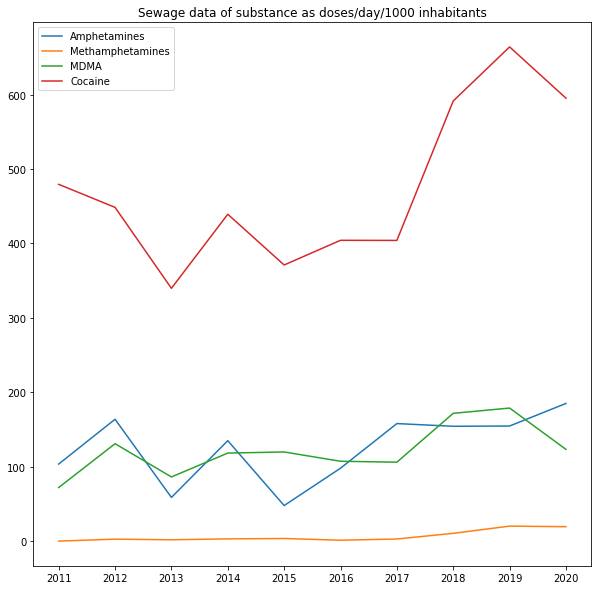

In [12]:
plt.plot(amphetamine_series, label = "Amphetamines")
plt.plot(methamphetamine_series, label = "Methamphetamines")
plt.plot(MDMA_series, label = "MDMA")
plt.plot(cocaine_series, label = "Cocaine")
plt.title("Sewage data of substance as doses/day/1000 inhabitants")
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.show()

<h1>Combining figures to identify trends</h1>

<h3>MDMA mentions vs MDMA in sewage in NL</h3>

In [13]:
mdma_results = count_mentions('MDMA')
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_results = mdma_results.resample('1M').sum()

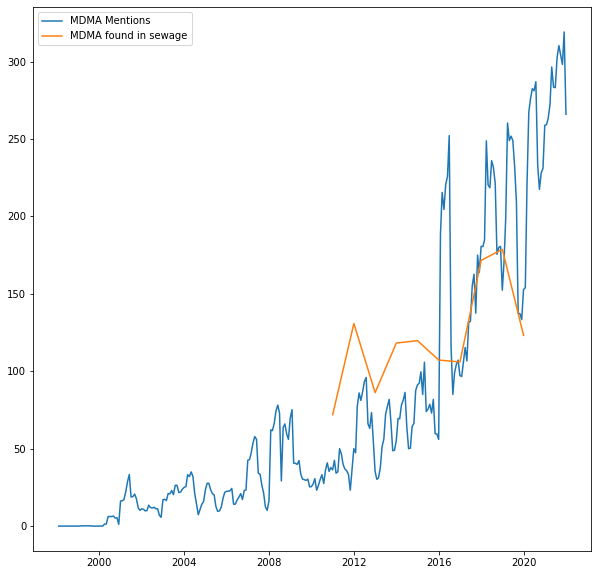

In [14]:
# Give amphetamine_series a datetime index so it can be plotted with the mentions
MDMA_series.index = pd.to_datetime(MDMA_series.index)
# skip first values that are 0 and get a rolling mean of 6 months
final_mdma_mentions = monthly_mdma_results[220:].rolling(window=6).mean()


plt.plot(final_mdma_mentions.multiply(1), label='MDMA Mentions')
plt.plot(MDMA_series.multiply(1), label='MDMA found in sewage')
plt.legend()
plt.show()

<h3>Amphetamine mentions vs amphetamines sewage in NL</h3>

In [15]:
amphetamine_results = count_multiple_mentions('Amfetamine', 'Amphetamine')
amphetamine_results.set_index('date', inplace=True)
amphetamine_results.index = pd.to_datetime(amphetamine_results.index)
monthly_amphetamine_results = amphetamine_results.resample('1M').sum()

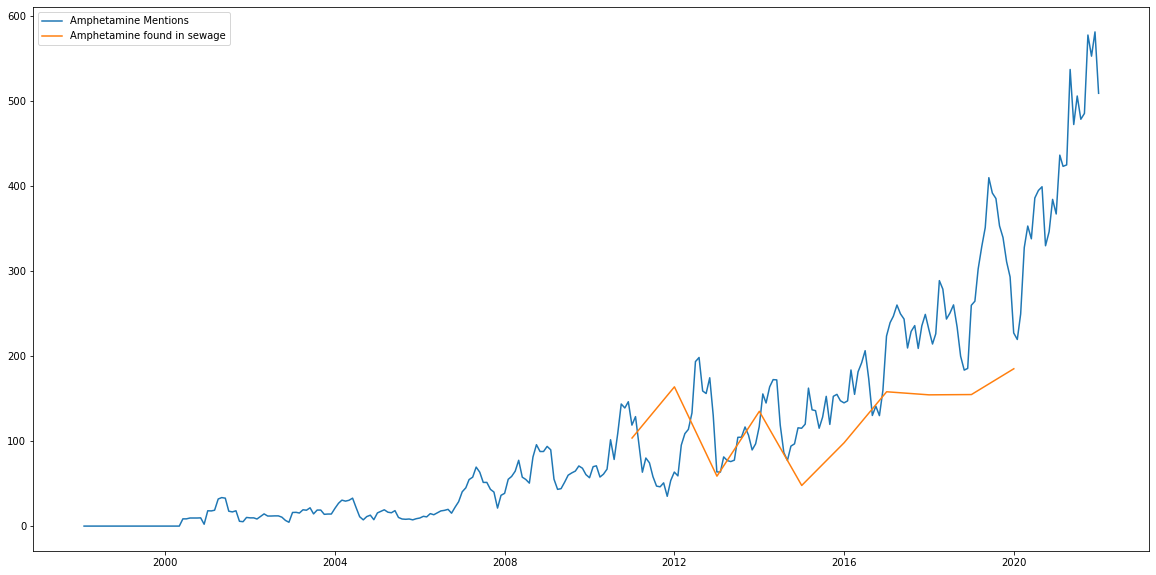

In [46]:
# Give amphetamine_series a datetime index so it can be plotted with the mentions
amphetamine_series.index = pd.to_datetime(amphetamine_series.index)
# skip first values that are 0 and get a rolling mean of 6 months
final_amphetamine_mentions = monthly_amphetamine_results[220:].rolling(window=6).mean()

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(final_amphetamine_mentions.multiply(1), label='Amphetamine Mentions')
plt.plot(amphetamine_series.multiply(1), label='Amphetamine found in sewage')
plt.legend()
plt.show()

<h3>Methamphetamine mentions vs methamphetamine sewage in NL</h3>

In [17]:
methamphetamine_results = count_multiple_mentions('Methamfetamine', 'Methamphetamine')
methamphetamine_results.set_index('date', inplace=True)
methamphetamine_results.index = pd.to_datetime(methamphetamine_results.index)
monthly_methamphetamine_results = methamphetamine_results.resample('1M').sum()

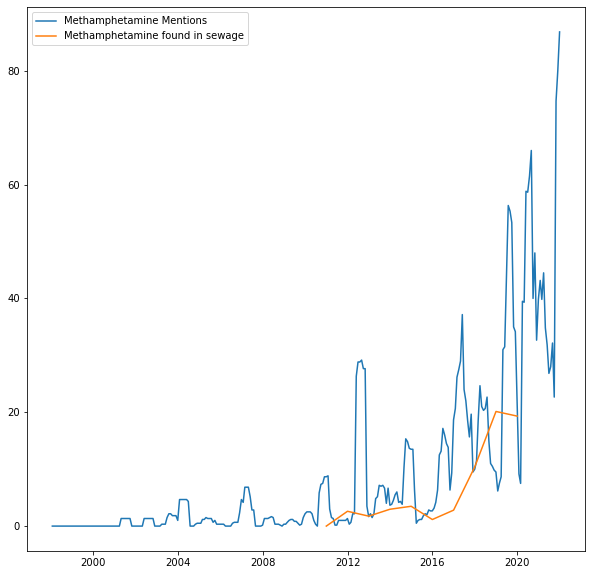

In [18]:
# Give amphetamine_series a datetime index so it can be plotted with the mentions
methamphetamine_series.index = pd.to_datetime(methamphetamine_series.index)
# skip first values that are 0 and get a rolling mean of 6 months
final_methamphetamine_mentions = monthly_methamphetamine_results[220:].rolling(window=6).mean()

plt.plot(final_methamphetamine_mentions.multiply(1), label='Methamphetamine Mentions')
plt.plot(methamphetamine_series.multiply(1), label='Methamphetamine found in sewage')
plt.legend()
plt.show()

<h3>Cocaine mentions vs cocaine sewage in NL</h3>

In [26]:
cocaine_results = count_multiple_mentions('Cocaïne', 'Cocaine')
cocaine_results.set_index('date', inplace=True)
cocaine_results.index = pd.to_datetime(cocaine_results.index)
monthly_cocaine_results = cocaine_results.resample('1M').sum()

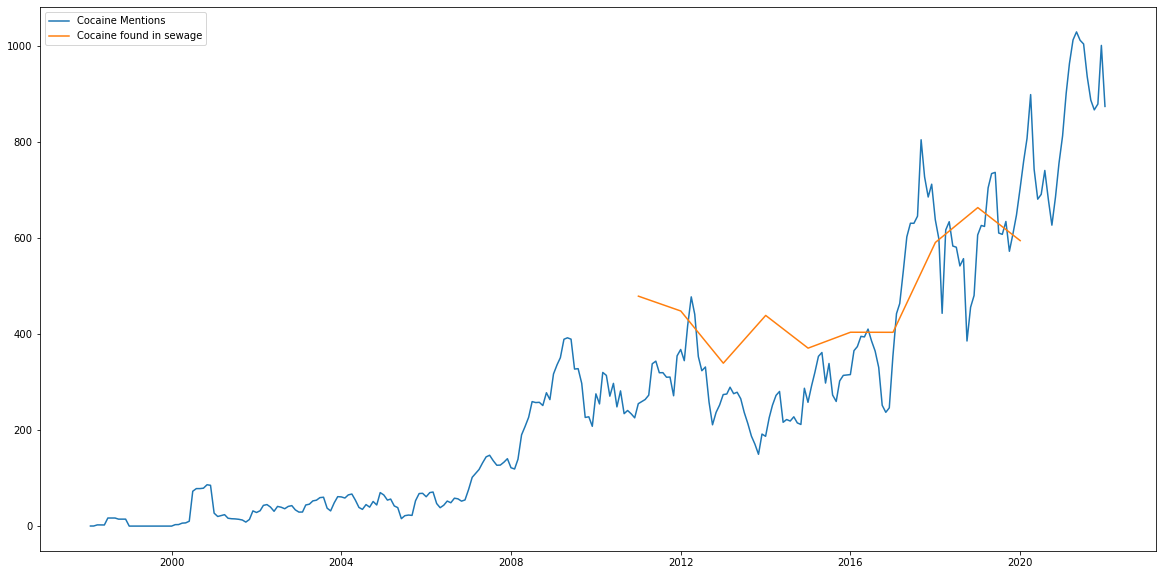

In [45]:
# Give amphetamine_series a datetime index so it can be plotted with the mentions
cocaine_series.index = pd.to_datetime(cocaine_series.index)
# skip first values that are 0 and get a rolling mean of 6 months
final_cocaine_mentions = monthly_cocaine_results[220:].rolling(window=6).mean()

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(final_cocaine_mentions.multiply(1), label='Cocaine Mentions')
plt.plot(cocaine_series.multiply(1), label='Cocaine found in sewage')
plt.legend()
plt.show()

In [139]:
xtc_results = count_multiple_mentions('XTC', 'MDMA')
xtc_results.set_index('date', inplace=True)
xtc_results.index = pd.to_datetime(xtc_results.index)
monthly_xtc_results = xtc_results.resample('1M').sum()

safrol_results = count_multiple_mentions('safrol', 'isosafrol')
safrol_results.set_index('date', inplace=True)
safrol_results.index = pd.to_datetime(safrol_results.index)
monthly_safrol_results = safrol_results.resample('1M').sum()

piperonal_results = count_multiple_mentions('piperonal', 'piperonalglycidaat')
piperonal_results.set_index('date', inplace=True)
piperonal_results.index = pd.to_datetime(piperonal_results.index)
monthly_piperonal_results = piperonal_results.resample('1M').sum()

PMK_results = count_multiple_mentions('PMK', 'BMK')
PMK_results.set_index('date', inplace=True)
PMK_results.index = pd.to_datetime(PMK_results.index)
monthly_PMK_results = PMK_results.resample('1M').sum()

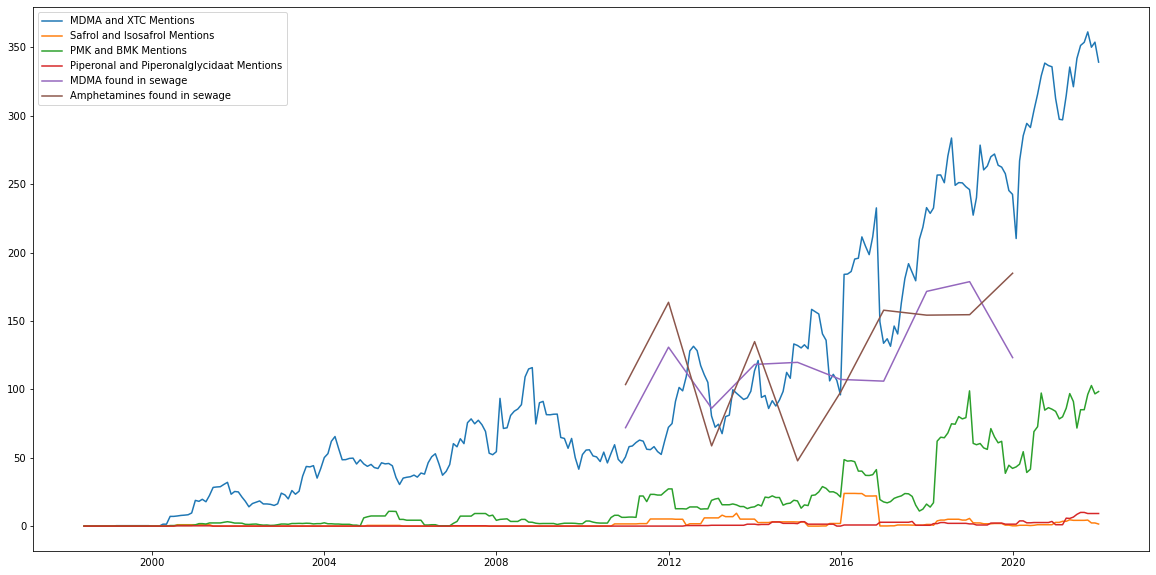

In [142]:
# Give amphetamine_series a datetime index so it can be plotted with the mentions
MDMA_series.index = pd.to_datetime(MDMA_series.index)
amphetamine_series.index = pd.to_datetime(amphetamine_series.index)

# skip first values that are 0 and get a rolling mean of 6 months
final_xtc_mentions = monthly_xtc_results[220:].rolling(window=10).mean()
final_safrol_mentions = monthly_safrol_results[220:].rolling(window=10).mean()
final_PMK_mentions = monthly_PMK_results[220:].rolling(window=10).mean()
final_piperonal_mentions = monthly_piperonal_results[220:].rolling(window=10).mean()



plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(final_xtc_mentions.multiply(1), label='MDMA and XTC Mentions')
plt.plot(final_safrol_mentions.multiply(1), label='Safrol and Isosafrol Mentions')
plt.plot(final_PMK_mentions.multiply(1), label='PMK and BMK Mentions')
plt.plot(final_piperonal_mentions.multiply(2), label='Piperonal and Piperonalglycidaat Mentions')


plt.plot(MDMA_series.multiply(1), label='MDMA found in sewage')
plt.plot(amphetamine_series.multiply(1), label='Amphetamines found in sewage')

plt.legend()
plt.show()

<h3>Correlation between mentions</h3>

In [143]:
frame = {"XTC Mentions": monthly_xtc_results['count'].astype('float64'), "PMK Mentions": monthly_PMK_results['count'], "Safrol Mentions": monthly_safrol_results['count'], "Piperonal Mentions": monthly_piperonal_results['count']}
correlation_df = pd.DataFrame(frame)
correlation_df.corr()


XTC Mentions  PMK Mentions  Safrol Mentions  \
XTC Mentions            1.000000      0.608702         0.403581   
PMK Mentions            0.608702      1.000000         0.405380   
Safrol Mentions         0.403581      0.405380         1.000000   
Piperonal Mentions      0.336863      0.249383         0.134087   

                    Piperonal Mentions  
XTC Mentions                  0.336863  
PMK Mentions                  0.249383  
Safrol Mentions               0.134087  
Piperonal Mentions            1.000000

<h3>Correlation between mentions and sewage on a yearly basis</h3>

In [145]:
frame = {"XTC Mentions": xtc_results.resample('1Y').sum().iloc[32:42]['count'], "PMK Mentions": PMK_results.resample('1Y').sum().iloc[32:42]['count'], "Safrol Mentions": safrol_results.resample('1Y').sum().iloc[32:42]['count'], "Piperonal Mentions": piperonal_results.resample('1Y').sum().iloc[32:42]['count'], "MDMA Sewage": MDMA_series.values, "Amphetamine Sewage": amphetamine_series.values}
correlation_df = pd.DataFrame(frame)
correlation_df.corr()

XTC Mentions  PMK Mentions  Safrol Mentions  \
XTC Mentions            1.000000      0.783280         0.029224   
PMK Mentions            0.783280      1.000000         0.125300   
Safrol Mentions         0.029224      0.125300         1.000000   
Piperonal Mentions      0.673316      0.716057         0.504622   
MDMA Sewage             0.534084      0.587747        -0.214878   
Amphetamine Sewage      0.642020      0.475680        -0.217933   

                    Piperonal Mentions  MDMA Sewage  Amphetamine Sewage  
XTC Mentions                  0.673316     0.534084            0.642020  
PMK Mentions                  0.716057     0.587747            0.475680  
Safrol Mentions               0.504622    -0.214878           -0.217933  
Piperonal Mentions            1.000000     0.313630            0.151497  
MDMA Sewage                   0.313630     1.000000            0.500539  
Amphetamine Sewage            0.151497     0.500539            1.000000

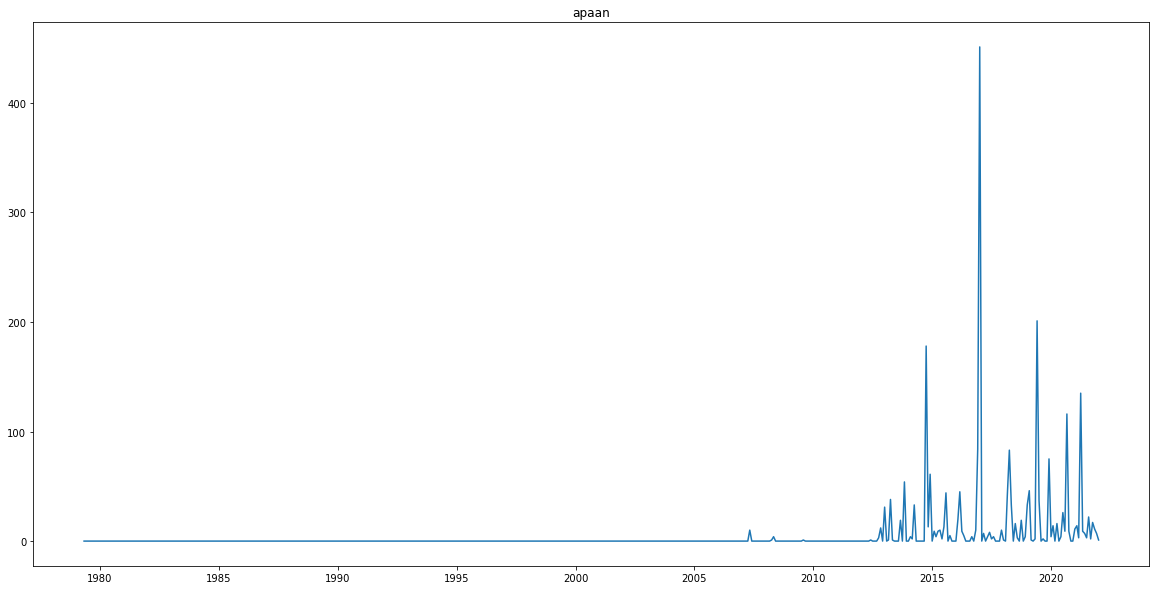

In [150]:
mdma_results = count_mentions('Apaan')
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_result = mdma_results.resample('1M').sum()

plt.plot(monthly_mdma_result)
plt.title("apaan")

plt.show()


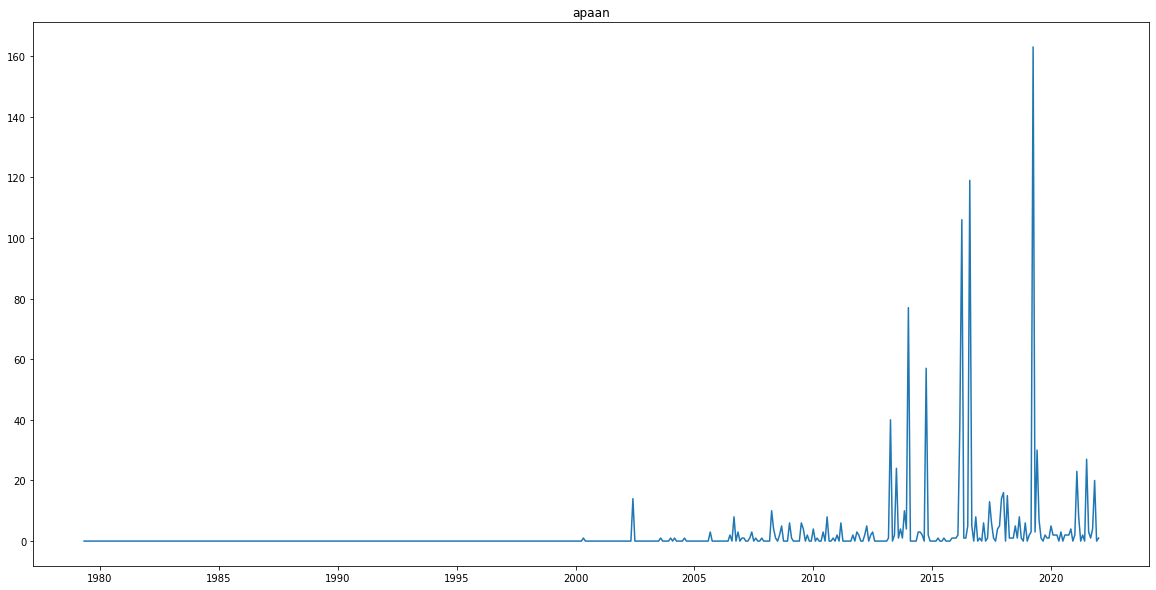

In [153]:
mdma_results = count_mentions('GBL')
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_result = mdma_results.resample('1M').sum()

plt.plot(monthly_mdma_result)
plt.title("apaan")

plt.show()

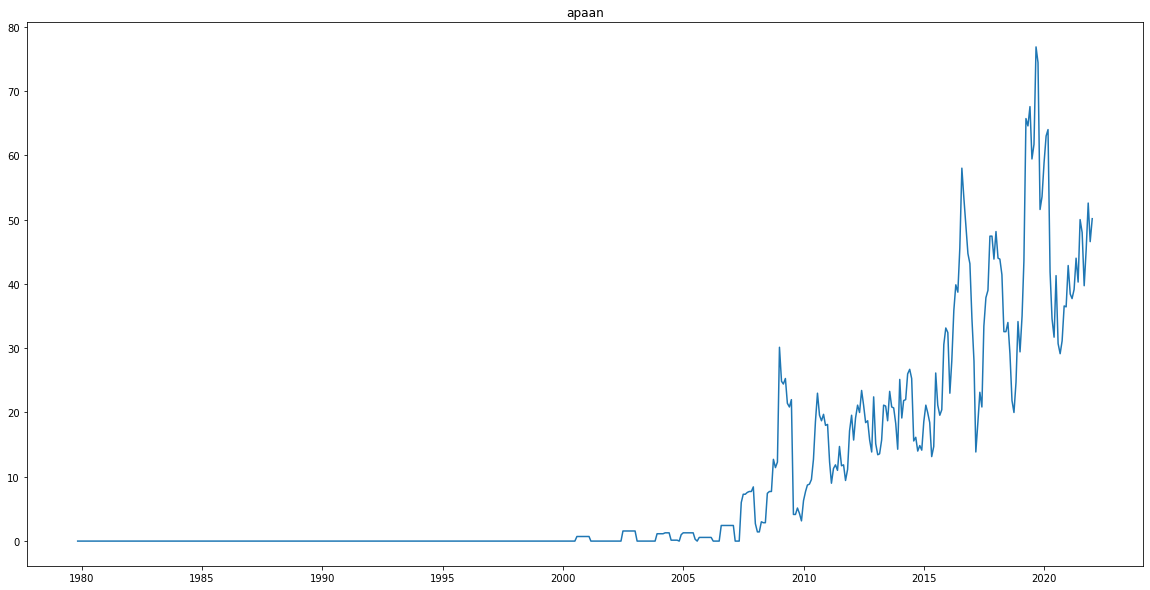

In [156]:
mdma_results = count_mentions('GHB')
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_result = mdma_results.resample('1M').sum()
monthly_mdma_result = monthly_mdma_result.rolling(window=7).mean()
plt.plot(monthly_mdma_result)
plt.title("apaan")

plt.show()